## Zillow Housing Forecasting

#### Author: Kyle Dufrane

## Business Understanding:

#### Our stakeholder is a national real estate firm that is looking to invest in the current housing market. They're looking for the top 25 most profitable zip codes from the past 15 years anywhere in the U.S. 

## Data Understanding

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller

sns.set_style('darkgrid')
pd.set_option('display.max_columns', 999)

In [2]:
df = pd.read_csv('Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon_1.csv')
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,1999-01-31,1999-02-28,1999-03-31,1999-04-30,1999-05-31,1999-06-30,1999-07-31,1999-08-31,1999-09-30,1999-10-31,1999-11-30,1999-12-31,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,190326.0,189141.0,189204.0,189184.0,189617.0,190143.0,190050.0,190716.0,191006.0,192332.0,193351.0,194629.0,195822.0,198184.0,199522.0,200279.0,200960.0,201676.0,203826.0,204267.0,205610.0,205330.0,206963.0,209099.0,211915.0,214608.0,218032.0,221994.0,225131.0,228437.0,230544.0,234624.0,238545.0,243892.0,246984.0,249192.0,251478.0,253822.0,256305.0,258086.0,261583.0,265795.0,272467.0,278865.0,286053.0,292290.0,299184.0,306010.0,311352.0,317402.0,323472.0,331723.0,339181.0,346161.0,3

In [3]:
df.columns[:11]

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'City', 'Metro', 'CountyName', '1996-01-31', '1996-02-29'],
      dtype='object')

#### This dataset comes from [Zillow Research](https://www.zillow.com/research/data/). The dataset selected is labeled 'ZHVI All Homes (SFR, Condo/Co-op) Time Series, Smoothed, Seasonally Adjusted' filtered by Zip Code.

#### As we can see in the cell above our dataset contains nine columns followed by 305 columns with home values by date. 

#### To start understanding out data, we will identify what each of the first nine columns mean below: 

* RegionID: Based on my research this seems to be Zillow specific.
* SizeRank: Further analysis is needed. 
* RegionName: Zipcode
* RegionType: Denotes region type - I.E. RegionName = Zipcode
* StateName: U.S. State 
* State: U.S. State 
* City: City associated to zipcode
* Metro: Metroplitian Area
* CountyName: name of the county the zipcode resides in

#### At first glance, it looks like these values are at the end of each month starting on January 31st, 1996 and ending on May 31st, 2021. Since our stakeholder is only concerned with the past 15 years we will filter our date columns to January 2006 until present. In Zillows summary they state that these values are representative of a 'typical home value'. They do not elaborate further on their definition. Moving forward we will assume that this is the mean price for all homes within a given zip code. 

#### To get a more indepth look into our data, lets see if we can get a clearer picture on what SizeRank denotes in our dataset. 

In [4]:
df['SizeRank'].value_counts()

34430    48
29964    42
30545    37
30892    36
29685    36
         ..
5924      1
3863      1
1814      1
7957      1
72        1
Name: SizeRank, Length: 11088, dtype: int64

In [5]:
df[df['SizeRank'] == 29685].head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,1999-01-31,1999-02-28,1999-03-31,1999-04-30,1999-05-31,1999-06-30,1999-07-31,1999-08-31,1999-09-30,1999-10-31,1999-11-30,1999-12-31,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31
27734,61051,29685,8324,Zip,NJ,NJ,Maurice River Township,Vineland-Bridgeton,Cumberland County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143205.0,143610.0,143087.0,143861.0,144782.0,146670.0,146

In [6]:
df[df['SizeRank'] == 34430].head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,1999-01-31,1999-02-28,1999-03-31,1999-04-30,1999-05-31,1999-06-30,1999-07-31,1999-08-31,1999-09-30,1999-10-31,1999-11-30,1999-12-31,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31
30787,58001,34430,501,Zip,NY,NY,Holtsville,New York-Newark-Jersey City,Suffolk County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

#### Above we reviewed the total value counts per unqiue item in the SizeRank column. This didnt lead to much insite as we have a total of 11088 total values in this column. Randomly selecting two variables I filtered the columns to see if any features would catch my eye. After a quick google search on population data I can see that the first five in the first filtered dataframe have a population of +/- 5000 from eachother with a few of them being closer to each other in total count with +/- 100. When I reviewed the second dataframe I found that population did not group these cities due to Northhampton, MA having a population of ~30,000 & Vallecito, CA havin a population ~250. This column could denote some form of county population but since our stakeholder is looking at strictly a profit investment this is unneeded noise at this point. 

#### Two other unrelated items did catch my eye. The first being not all zipcodes are of even legnth. As you can see with Holtsvillem, NY the zipcode is '501' which is not a valie zipcode. With a quick google search, I found that in fact '00501' is the correct zipcode for Holtsville. We will have to keep this in the back of our head later down the road and make sure to make changes as needed for our stakeholder. Secondly, we having missing values in our Metro column and our first date column. We will dive further into this in the next section. 

#### To conclude our data understanding section our dataset from Zillow Research contains typical home values on a monthly occurrence from 1996 to present grouped by zip code. 

#### Next we will begin cleaning our data. 

## Data Cleaning:

#### To start our data cleaning process we will go back to our business understanding. Our stakeholder is only concerned with the past 15 years of price changes therefore we will filter our date columns based on this information. Moving forward our dates will be from 1-31-2006 till 1-31-2021. 

#### Given that we are after 15 years of data at 12 month increments we can assume that this column will be 180 rows from our total row count of 314 which should give us a good starting point to filter our data. 

In [7]:
df.iloc[:, 134:]

,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31
0,871181.0,878796.0,866055.0,836472.0,805700.0,798541.0,814216.0,822587.0,825529.0,819306.0,821865.0,821016.0,815644.0,819915.0,823189.0,845492.0,864690.0,879440.0,879394.0,880878.0,881528.0,887043.0,894954.0,888468.0,877608.0,844712.0,839008.0,841982.0,842909.0,830831.0,802688.0,777861.0,754328.0,739456.0,723880.0,724656.0,722100.0,726020.0,711366.0,689938.0,673123.0,664228.0,662141.0,660674.0,660389.0,660227.0,663001.0,660170.0,661600.0,667320.0,676101.0,683076.0,688060.0,689210.0,694088.0,697420.0,704040.0,707052.0,704969.0,702365.0,700683.0,700218.0,700946.0,701454.0,699824.0,701231.0,701710.0,704496.0,702824.0,702067.0,703820.0,707120.0,710402.0,711330.0,712947.0,716365.0,722432.0,725823.0,729001.0,731718.0,737280.0,741820.0,746752.0,751474.0,756447.0,762301.0,769198.0,775327.0,781921.0,789317.0,799474.0,810626.0,822017.0,834983.0,846702.0,857915.0,867011.0,875002.0,882822.0,890845.0,897140.0,902825.0,906365.0,909313.0,912397.0,915288.0,919733.0,921448.0,926108.0,930387.0,937825.0,943030.0,950674.0,959121.0,966058.0,973564.0,977518.0,985841.0,989808.0,990648.0,986773.0,985796.0,986565.0,989103.0,989789.0,991599.0,995303.0,993791.0,990409.0,978011.0,969894.0,976794.0,987000.0,999580.0,998217.0,998379.0,991042.0,981041.0,974254.0,968536.0,978805.0,989847.0,1008218.0,1011406.0,1018999.0,1016413.0,1028480.0,1023903.0,1024399.0,1016175.0,1012716.0,1030975.0,1042328.0,1062816.0,1058344.0,1057445.0,1046707.0,1027498.0,1003479.0,999222.0,1003737.0,1015312.0,1012424.0,1011935.0,1001227.0,985030.0,977894.0,975693.0,980350.0,991299.0,1005641.0,1012842.0,1014076.0,1015660.0,1027308.0,1028815.0,1040011.0,1053436.0,1071606.0,1089141.0
1,500002.0,499752.0,499700.0,499149.0,499021.0,499025.0,499731.0,500447.0,501894.0,500409.0,500089.0,497065.0,496539.0,493406.0,493206.0,491427.0,491561.0,490568.0,489670.0,489922.0,485260.0,487458.0,480106.0,481058.0,473271.0,475130.0,469928.0,470039.0,465228.0,463424.0,456942.0,450222.0,445526.0,439931.0,439430.0,435666.0,436262.0,435045.0,436659.0,434756.0,434

#### We are off by a few rows. We will move our column count six spaces which should put us on in the January time frame. We will then subtract our final dataframe to the beginning of 2021.

In [8]:
df.iloc[:, 129:310]

,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31
0,845984.0,860997.0,865993.0,860605.0,861442.0,871181.0,878796.0,866055.0,836472.0,805700.0,798541.0,814216.0,822587.0,825529.0,819306.0,821865.0,821016.0,815644.0,819915.0,823189.0,845492.0,864690.0,879440.0,879394.0,880878.0,881528.0,887043.0,894954.0,888468.0,877608.0,844712.0,839008.0,841982.0,842909.0,830831.0,802688.0,777861.0,754328.0,739456.0,723880.0,724656.0,722100.0,726020.0,711366.0,689938.0,673123.0,664228.0,662141.0,660674.0,660389.0,660227.0,663001.0,660170.0,661600.0,667320.0,676101.0,683076.0,688060.0,689210.0,694088.0,697420.0,704040.0,707052.0,704969.0,702365.0,700683.0,700218.0,700946.0,701454.0,699824.0,701231.0,701710.0,704496.0,702824.0,702067.0,703820.0,707120.0,710402.0,711330.0,712947.0,716365.0,722432.0,725823.0,729001.0,731718.0,737280.0,741820.0,746752.0,751474.0,756447.0,762301.0,769198.0,775327.0,781921.0,789317.0,799474.0,810626.0,822017.0,834983.0,846702.0,857915.0,867011.0,875002.0,882822.0,890845.0,897140.0,902825.0,906365.0,909313.0,912397.0,915288.0,919733.0,921448.0,926108.0,930387.0,937825.0,943030.0,950674.0,959121.0,966058.0,973564.0,977518.0,985841.0,989808.0,990648.0,986773.0,985796.0,986565.0,989103.0,989789.0,991599.0,995303.0,993791.0,990409.0,978011.0,969894.0,976794.0,987000.0,999580.0,998217.0,998379.0,991042.0,981041.0,974254.0,968536.0,978805.0,989847.0,1008218.0,1011406.0,1018999.0,1016413.0,1028480.0,1023903.0,1024399.0,1016175.0,1012716.0,1030975.0,1042328.0,1062816.0,1058344.0,1057445.0,1046707.0,1027498.0,1003479.0,999222.0,1003737.0,1015312.0,1012424.0,1011935.0,1001227.0,985030.0,977894.0,975693.0,980350.0,991299.0,1005641.0,1012842.0,1014076.0,1015660.0,1027308.0,1028815.0
1,490670.0,493222.0,495106.0,497627.0,498846.0,500002.0,499752.0,499700.0,499149.0,499021.0,499025.0,499731.0,500447.0,501894.0,500409.0,500089.0,497065.0,496539.0,493406.0,493206.0,491427.0,491561.0,490568.0,489670.0,489922.0,485260.0,487458.0,480106.0,481058.0,473271.0,475130.0,469928.0,470039.0,465228.0,463424.0,456942.0,450222.0,445526.0,43993

#### Above we now have our time frame of 1-1-2006 to 1-1-2021. Below we will create a new dataframe with these values along with the first nine columns from the original dataframe.

In [9]:
new_dates = df.iloc[:, 129:310]
original_cols = df.iloc[:, :9]
new_df = pd.concat([original_cols, new_dates], axis=1)

##### Now that we have created our dataframe we will see if any NaN values are present.

In [10]:
nan_values = new_df.isna()
nan_columns = nan_values.any()

columns_nan = new_df.columns[nan_columns].tolist()
len(columns_nan)

162

In [11]:
new_df[columns_nan].isna().sum()

Metro         7306
2006-01-31    6190
2006-02-28    6157
2006-03-31    6119
2006-04-30    6062
              ... 
2019-01-31      32
2019-02-28      32
2019-03-31      12
2020-05-31       4
2020-10-31       2
Length: 162, dtype: int64

#### We have 162 columns that contain NaN's with thousands of NaNs within each column. Moving forward we will have to identify a way to handle these missing values. 

In [12]:
new_df[columns_nan]

,Metro,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2020-05-31,2020-10-31
0,New York-Newark-Jersey City,845984.0,860997.0,865993.0,860605.0,861442.0,871181.0,878796.0,866055.0,836472.0,805700.0,798541.0,814216.0,822587.0,825529.0,819306.0,821865.0,821016.0,815644.0,819915.0,823189.0,845492.0,864690.0,879440.0,879394.0,880878.0,881528.0,887043.0,894954.0,888468.0,877608.0,844712.0,839008.0,841982.0,842909.0,830831.0,802688.0,777861.0,754328.0,739456.0,723880.0,724656.0,722100.0,726020.0,711366.0,689938.0,673123.0,664228.0,662141.0,660674.0,660389.0,660227.0,663001.0,660170.0,661600.0,667320.0,676101.0,683076.0,688060.0,689210.0,694088.0,697420.0,704040.0,707052.0,704969.0,702365.0,700683.0,700218.0,700946.0,701454.0,699824.0,701231.0,701710.0,704496.0,702824.0,702067.0,703820.0,707120.0,710402.0,711330.0,712947.0,716365.0,722432.0,725823.0,729001.0,731718.0,737280.0,741820.0,746752.0,751474.0,756447.0,762301.0,769198.0,775327.0,781921.0,789317.0,799474.0,810626.0,822017.0,834983.0,846702.0,857915.0,867011.0,875002.0,882822.0,890845.0,897140.0,902825.0,906365.0,909313.0,912397.0,915288.0,919733.0,921448.0,926108.0,930387.0,937825.0,943030.0,950674.0,959121.0,966058.0,973564.0,977518.0,985841.0,989808.0,990648.0,986773.0,985796.0,986565.0,989103.0,989789.0,991599.0,995303.0,993791.0,990409.0,978011.0,969894.0,976794.0,987000.0,999580.0,998217.0,998379.0,991042.0,981041.0,974254.0,968536.0,978805.0,989847.0,1008218.0,1011406.0,1018999.0,1016413.0,1028480.0,1023903.0,1024399.0,1016175.0,1012716.0,1030975.0,1042328.0,1062816.0,975693.0,1014076.0
1,Chicago-Naperville-Elgin,490670.0,493222.0,495106.0,497627.0,498846.0,500002.0,499752.0,499700.0,499149.0,499021.0,499025.0,499731.0,500447.0,501894.0,500409.0,500089.0,497065.0,496539.0,493406.0,493206.0,491427.0,491561.0,490568.0,489670.0,489922.0,485260.0,487458.0,480106.0,481058.0,473271.0,475130.0,469928.0,470039.0,465228.0,463424.0,456942.0,450222.0,445526.0,439931.0,439430.0,435666.0,436262.0,435045.0,436659.0,434756.0,434338.0,431660.0,433951.0,433998.0,436933.0,434030.0,435418.0,432336.0,433241.0,426849.0,423605.0,418827.0,416924.0,412950.0,410428.0,408759.0,408297.0,407693.0,404813.0,404027.0,401419.0,403728.0,402389.0,402912.0,398391.0,398981.0,395835.0,394179.0,387545.0,387719.0,387399.0,388966.0,387802.0,3

In [13]:
new_df[columns_nan].iloc[:, 2:62]

,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31
0,860997.0,865993.0,860605.0,861442.0,871181.0,878796.0,866055.0,836472.0,805700.0,798541.0,814216.0,822587.0,825529.0,819306.0,821865.0,821016.0,815644.0,819915.0,823189.0,845492.0,864690.0,879440.0,879394.0,880878.0,881528.0,887043.0,894954.0,888468.0,877608.0,844712.0,839008.0,841982.0,842909.0,830831.0,802688.0,777861.0,754328.0,739456.0,723880.0,724656.0,722100.0,726020.0,711366.0,689938.0,673123.0,664228.0,662141.0,660674.0,660389.0,660227.0,663001.0,660170.0,661600.0,667320.0,676101.0,683076.0,688060.0,689210.0,694088.0,697420.0
1,493222.0,495106.0,497627.0,498846.0,500002.0,499752.0,499700.0,499149.0,499021.0,499025.0,499731.0,500447.0,501894.0,500409.0,500089.0,497065.0,496539.0,493406.0,493206.0,491427.0,491561.0,490568.0,489670.0,489922.0,485260.0,487458.0,480106.0,481058.0,473271.0,475130.0,469928.0,470039.0,465228.0,463424.0,456942.0,450222.0,445526.0,439931.0,439430.0,435666.0,436262.0,435045.0,436659.0,434756.0,434338.0,431660.0,433951.0,433998.0,436933.0,434030.0,435418.0,432336.0,433241.0,426849.0,423605.0,418827.0,416924.0,412950.0,410428.0,408759.0
2,905457.0,913926.0,913295.0,917714.0,924403.0,931007.0,918936.0,891639.0,860760.0,853332.0,869166.0,878761.0,882328.0,876954.0,881746.0,884994.0,880266.0,881900.0,883638.0,909967.0,934441.0,951341.0,957818.0,964904.0,981082.0,983756.0,987241.0,968818.0,963122.0,935603.0,936522.0,933750.0,932680.0,923204.0,888361.0,853891.0,812192.0,798668.0,781915.0,783923.0,773155.0,771683.0,749243.0,726784.0,708208.0,698748.0,696085.0,695689.0,694734.0,691374.0,691570.0,688850.0,691702.0,700797.0,711921.0,720058.0,722211.0,719420.0,723104.0,729474.0
3,249355.0,249985.0,250734.0,251703.0,252572.0,253308.0,254352.0,255288.0,256197.0,256848.0,257518.0,258379.0,258833.0,259245.0,259507.0,259976.0,260200.0,260598.0,261503.0,262710.0,264078.0,265054.0,266108.0,266203.0,265825.0,264703.0,263943.0,263777.0,264154.0,264618.0,264630.0,264482.0,263410.0,262407.0,261363.0,261026.0,261456.0,262060.0,263032.0,263197.0,263484.0,264118.0,264713.0,265473.0,266743.0,268314.0,269440.0,269957.0,270548.0,272000.0,272903.0,273797.0,273687.0,272845.0,272027.0,270157.0,268853.0,267251.0,266984.0,266863.0
4,624191.0,626703.0,630081.0,631246.0,632428.0,632411.0,632854.0,632614.0,632687.0,633079.0,634367.0,636004.0,638609.0,637396.0,637172.0,633596.0,633362.0,629578.0,628962.0,626235.0,626299.0,625154.0,624147.0,624623.0,618300.0,620945.0,611248.0,612891.0,603131.0,605764.0,599890.0,600771.0,594654.0,592004.0,583839.0,575447.0,570032.0,562750.0,562219.0,557256.0,557547.0,555933.0,557213.0,554672.0,554400.0,551532.0,554902.0,554524.0,557823.0,553092.0,554218.0,549026.0,550043.0,541145.0,536881.0,530037.0,527708.0,522668.0,518386.0,515336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117599.0,118133.0,118539.0,118607.0,118735.0,117717.0,116292.0,115044.0,114507.0,113414.0,110729.0,107858.0,105591.0,103400.0,100905.0,99012.0,97517.0,96747.0,96354.0,95812.0,94591.0,93787.0,94372.0,95452.0,96572.0,97107.0,97548.0,97566.0,96365.0,96610.0,97461.0,98180.0,97908.0,97314.0,

#### Looking at the bottom of the above dataframe we can see that some of these values have NaN's from 2006 till 2013. With these rows missing half of our needed data we will drop these values going forward.

In [14]:
new_df[columns_nan].shape[1]

162

#### Below we drop all rows that are missing over 25% of their data.

In [15]:
perc = 25.0
min_count =  int(((100-perc)/100)*new_df.shape[1])
mod_df = new_df.dropna(axis=0, 
                        thresh=min_count)
mod_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,845984.0,860997.0,865993.0,860605.0,861442.0,871181.0,878796.0,866055.0,836472.0,805700.0,798541.0,814216.0,822587.0,825529.0,819306.0,821865.0,821016.0,815644.0,819915.0,823189.0,845492.0,864690.0,879440.0,879394.0,880878.0,881528.0,887043.0,894954.0,888468.0,877608.0,844712.0,839008.0,841982.0,842909.0,830831.0,802688.0,777861.0,754328.0,739456.0,723880.0,724656.0,722100.0,726020.0,711366.0,689938.0,673123.0,664228.0,662141.0,660674.0,660389.0,660227.0,663001.0,660170.0,661600.0,667320.0,676101.0,683076.0,688060.0,689210.0,694088.0,697420.0,704040.0,707052.0,704969.0,702365.0,700683.0,700218.0,700946.0,701454.0,699824.0,701231.0,701710.0,704496.0,702824.0,702067.0,703820.0,707120.0,710402.0,711330.0,712947.0,716365.0,722432.0,725823.0,729001.0,731718.0,737280.0,741820.0,746752.0,751474.0,756447.0,762301.0,769198.0,775327.0,781921.0,789317.0,799474.0,810626.0,822017.0,834983.0,846702.0,857915.0,867011.0,875002.0,882822.0,890845.0,897140.0,902825.0,906365.0,909313.0,912397.0,915288.0,919733.0,921448.0,926108.0,930387.0,937825.0,943030.0,950674.0,959121.0,966058.0,973564.0,977518.0,985841.0,989808.0,990648.0,986773.0,985796.0,986565.0,989103.0,989789.0,991599.0,995303.0,993791.0,990409.0,978011.0,969894.0,976794.0,987000.0,999580.0,998217.0,998379.0,991042.0,981041.0,974254.0,968536.0,978805.0,989847.0,1008218.0,1011406.0,1018999.0,1016413.0,1028480.0,1023903.0,1024399.0,1016175.0,1012716.0,1030975.0,1042328.0,1062816.0,1058344.0,1057445.0,1046707.0,1027498.0,1003479.0,999222.0,1003737.0,1015312.0,1012424.0,1011935.0,1001227.0,985030.0,977894.0,975693.0,980350.0,991299.0,1005641.0,1012842.0,1014076.0,1015660.0,1027308.0,1028815.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,490670.0,493222.0,495106.0,497627.0,498846.0,500002.0,499752.0,499700.0,499149.0,499021.0,499025.0,499731.0,500447.0,501894

In [16]:
mod_df.iloc[:, 9:]

,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31
0,845984.0,860997.0,865993.0,860605.0,861442.0,871181.0,878796.0,866055.0,836472.0,805700.0,798541.0,814216.0,822587.0,825529.0,819306.0,821865.0,821016.0,815644.0,819915.0,823189.0,845492.0,864690.0,879440.0,879394.0,880878.0,881528.0,887043.0,894954.0,888468.0,877608.0,844712.0,839008.0,841982.0,842909.0,830831.0,802688.0,777861.0,754328.0,739456.0,723880.0,724656.0,722100.0,726020.0,711366.0,689938.0,673123.0,664228.0,662141.0,660674.0,660389.0,660227.0,663001.0,660170.0,661600.0,667320.0,676101.0,683076.0,688060.0,689210.0,694088.0,697420.0,704040.0,707052.0,704969.0,702365.0,700683.0,700218.0,700946.0,701454.0,699824.0,701231.0,701710.0,704496.0,702824.0,702067.0,703820.0,707120.0,710402.0,711330.0,712947.0,716365.0,722432.0,725823.0,729001.0,731718.0,737280.0,741820.0,746752.0,751474.0,756447.0,762301.0,769198.0,775327.0,781921.0,789317.0,799474.0,810626.0,822017.0,834983.0,846702.0,857915.0,867011.0,875002.0,882822.0,890845.0,897140.0,902825.0,906365.0,909313.0,912397.0,915288.0,919733.0,921448.0,926108.0,930387.0,937825.0,943030.0,950674.0,959121.0,966058.0,973564.0,977518.0,985841.0,989808.0,990648.0,986773.0,985796.0,986565.0,989103.0,989789.0,991599.0,995303.0,993791.0,990409.0,978011.0,969894.0,976794.0,987000.0,999580.0,998217.0,998379.0,991042.0,981041.0,974254.0,968536.0,978805.0,989847.0,1008218.0,1011406.0,1018999.0,1016413.0,1028480.0,1023903.0,1024399.0,1016175.0,1012716.0,1030975.0,1042328.0,1062816.0,1058344.0,1057445.0,1046707.0,1027498.0,1003479.0,999222.0,1003737.0,1015312.0,1012424.0,1011935.0,1001227.0,985030.0,977894.0,975693.0,980350.0,991299.0,1005641.0,1012842.0,1014076.0,1015660.0,1027308.0,1028815.0
1,490670.0,493222.0,495106.0,497627.0,498846.0,500002.0,499752.0,499700.0,499149.0,499021.0,499025.0,499731.0,500447.0,501894.0,500409.0,500089.0,497065.0,496539.0,493406.0,493206.0,491427.0,491561.0,490568.0,489670.0,489922.0,485260.0,487458.0,480106.0,481058.0,473271.0,475130.0,469928.0,470039.0,465228.0,463424.0,456942.0,450222.0,445526.0,43993

#### The above dataframe shows that the most data we're missing goes until 12-31-2008. Below we will take a look into all of the columns to verify that we're not still missing a significat amount of values. 

In [17]:
na_values = pd.DataFrame(mod_df.iloc[:,9:].isna().sum())
na_values[na_values[0] >= 1]

,0
2006-01-31,3282
2006-02-28,3249
2006-03-31,3211
2006-04-30,3154
2006-05-31,3135
2006-06-30,3093
2006-07-31,3005
2006-08-31,2979
2006-09-30,2934
2006-10-31,2913


#### In the dataframe above we can see all of our rows that contain missing values. We have a sharp decrease in missing values past the 2007 year mark. We will move forward back filling this data which will put these areas at a significant disadvantage to others as they will have the same value for ~3 years. This data is important to keep as these areas, though at a disadvantage, may be seeing booms in the housing market. 

In [18]:
clean_df = mod_df.bfill(axis='columns')
clean_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,845984.0,860997.0,865993.0,860605.0,861442.0,871181.0,878796.0,866055.0,836472.0,805700.0,798541.0,814216.0,822587.0,825529.0,819306.0,821865.0,821016.0,815644.0,819915.0,823189.0,845492.0,864690.0,879440.0,879394.0,880878.0,881528.0,887043.0,894954.0,888468.0,877608.0,844712.0,839008.0,841982.0,842909.0,830831.0,802688.0,777861.0,754328.0,739456.0,723880.0,724656.0,722100.0,726020.0,711366.0,689938.0,673123.0,664228.0,662141.0,660674.0,660389.0,660227.0,663001.0,660170.0,661600.0,667320.0,676101.0,683076.0,688060.0,689210.0,694088.0,697420.0,704040.0,707052.0,704969.0,702365.0,700683.0,700218.0,700946.0,701454.0,699824.0,701231.0,701710.0,704496.0,702824.0,702067.0,703820.0,707120.0,710402.0,711330.0,712947.0,716365.0,722432.0,725823.0,729001.0,731718.0,737280.0,741820.0,746752.0,751474.0,756447.0,762301.0,769198.0,775327.0,781921.0,789317.0,799474.0,810626.0,822017.0,834983.0,846702.0,857915.0,867011.0,875002.0,882822.0,890845.0,897140.0,902825.0,906365.0,909313.0,912397.0,915288.0,919733.0,921448.0,926108.0,930387.0,937825.0,943030.0,950674.0,959121.0,966058.0,973564.0,977518.0,985841.0,989808.0,990648.0,986773.0,985796.0,986565.0,989103.0,989789.0,991599.0,995303.0,993791.0,990409.0,978011.0,969894.0,976794.0,987000.0,999580.0,998217.0,998379.0,991042.0,981041.0,974254.0,968536.0,978805.0,989847.0,1008218.0,1011406.0,1018999.0,1016413.0,1028480.0,1023903.0,1024399.0,1016175.0,1012716.0,1030975.0,1042328.0,1062816.0,1058344.0,1057445.0,1046707.0,1027498.0,1003479.0,999222.0,1003737.0,1015312.0,1012424.0,1011935.0,1001227.0,985030.0,977894.0,975693.0,980350.0,991299.0,1005641.0,1012842.0,1014076.0,1015660.0,1027308.0,1028815.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,490670.0,493222.0,495106.0,497627.0,498846.0,500002.0,499752.0,499700.0,499149.0,499021.0,499025.0,499731.0,500447.0,501894

In [19]:
clean_df.iloc[:, :9].isna().sum()

RegionID      0
SizeRank      0
RegionName    0
RegionType    0
StateName     0
State         0
City          0
Metro         0
CountyName    0
dtype: int64

#### Awesome, we can now see that our first nine columns have zero NaN values and we have eliminated all of our NaN values from all columns post CountyName.

#### Since our stakeholder is only concerned about the top 25 most profitable zip codes. We will create a new column based to show max profit from 2006 to 2021 and sort accordingly. 

In [20]:
clean_df['15_yr_Profit'] = clean_df['2021-01-31'] - clean_df['2006-01-31']

clean_df = clean_df.sort_values('15_yr_Profit', ascending=False)

clean_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,15_yr_Profit
20675,62309,21453,11962,Zip,NY,NY,Sagaponack,New York-Newark-Jersey City,Suffolk County,3043100.0,3130526.0,3214359.0,3303308.0,3385921.0,3475642.0,3520254.0,3606951.0,3680653.0,3757357.0,3807778.0,3839202.0,3764095.0,3702979.0,3651744.0,3626729.0,3600918.0,3568309.0,3579389.0,3566136.0,3551233.0,3536558.0,3503431.0,3492606.0,3526787.0,3563092.0,3591084.0,3541892.0,3504756.0,3459380.0,3444140.0,3420922.0,3384914.0,3336030.0,3307357.0,3284243.0,3283564.0,3264539.0,3254649.0,3246967.0,3234671.0,3216088.0,3188391.0,3166578.0,3183274.0,3202804.0,3236151.0,3251648.0,3240745.0,3247527.0,3247511.0,3283218.0,3303326.0,3320050.0,3324990.0,3331326.0,3324825.0,3310438.0,3288395.0,3268286.0,3271706.0,3277336.0,3289576.0,3279103.0,3271463.0,3267106.0,3251693.0,3234143.0,3221200.0,3249297.0,3278146.0,3316230.0,3324165.0,3302879.0,3284659.0,3307447.0,3341784.0,3378104.0,3409125.0,3463928.0,3502274.0,3496221.0,3459222.0,3413538.0,3390936.0,3419973.0,3429477.0,3421222.0,3410349.0,3429864.0,3474977.0,3505400.0,3545520.0,3583498.0,3654737.0,3727159.0,3817207.0,3849130.0,3905299.0,3959685.0,4028940.0,4067485.0,4078673.0,4085208.0,4100255.0,4133279.0,4175570.0,4236371.0,4286620.0,4360388.0,4402265.0,4419167.0,4410453.0,4411703.0,4447826.0,4479323.0,4502916.0,4530140.0,4524350.0,4490890.0,4452930.0,4455941.0,4499839.0,4540602.0,4561120.0,4563803.0,4541370.0,4552489.0,4548612.0,4542714.0,4544356.0,4578996.0,4597616.0,4572764.0,4519687.0,4525403.0,4574075.0,4643451.0,4698960.0,4714446.0,4734008.0,4757276.0,4800996.0,4824645.0,4849624.0,4878181.0,4914312.0,4887832.0,4859830.0,4837866.0,4868819.0,4905350.0,4939492.0,4965025.0,4968713.0,4966601.0,4957652.0,4961521.0,4973245.0,5010413.0,5027475.0,5034187.0,5029377.0,5040681.0,5035617.0,5011030.0,4964678.0,4950301.0,4964023.0,5013146.0,5054332.0,5080477.0,5092707.0,5108927.0,5124652.0,5143760.0,5179782.0,5239197.0,5327955.0,5404176.0,5468141.0,2425041.0
12344,975

#### Starting to understand our data. NY has the highest profitability but also highest loss. 

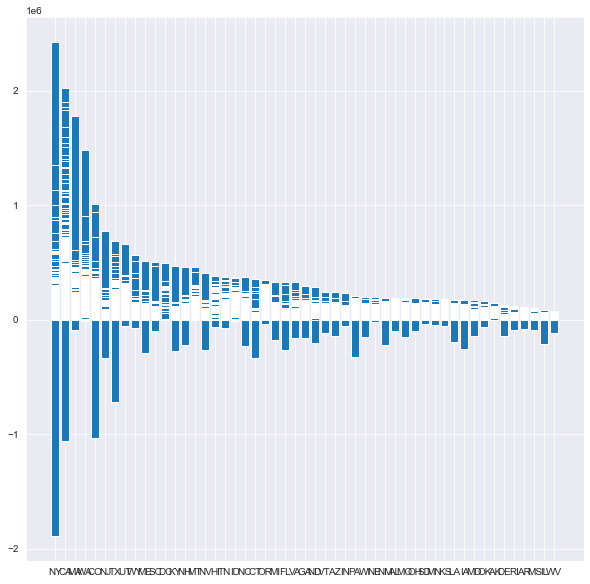

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(clean_df['State'], clean_df['15_yr_Profit']);

#### To look at our top 25 most profitable zip codes we filter below and plot

In [22]:
top_25_zip = clean_df[:25]
top_25_zip.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,15_yr_Profit
20675,62309,21453,11962,Zip,NY,NY,Sagaponack,New York-Newark-Jersey City,Suffolk County,3043100.0,3130526.0,3214359.0,3303308.0,3385921.0,3475642.0,3520254.0,3606951.0,3680653.0,3757357.0,3807778.0,3839202.0,3764095.0,3702979.0,3651744.0,3626729.0,3600918.0,3568309.0,3579389.0,3566136.0,3551233.0,3536558.0,3503431.0,3492606.0,3526787.0,3563092.0,3591084.0,3541892.0,3504756.0,3459380.0,3444140.0,3420922.0,3384914.0,3336030.0,3307357.0,3284243.0,3283564.0,3264539.0,3254649.0,3246967.0,3234671.0,3216088.0,3188391.0,3166578.0,3183274.0,3202804.0,3236151.0,3251648.0,3240745.0,3247527.0,3247511.0,3283218.0,3303326.0,3320050.0,3324990.0,3331326.0,3324825.0,3310438.0,3288395.0,3268286.0,3271706.0,3277336.0,3289576.0,3279103.0,3271463.0,3267106.0,3251693.0,3234143.0,3221200.0,3249297.0,3278146.0,3316230.0,3324165.0,3302879.0,3284659.0,3307447.0,3341784.0,3378104.0,3409125.0,3463928.0,3502274.0,3496221.0,3459222.0,3413538.0,3390936.0,3419973.0,3429477.0,3421222.0,3410349.0,3429864.0,3474977.0,3505400.0,3545520.0,3583498.0,3654737.0,3727159.0,3817207.0,3849130.0,3905299.0,3959685.0,4028940.0,4067485.0,4078673.0,4085208.0,4100255.0,4133279.0,4175570.0,4236371.0,4286620.0,4360388.0,4402265.0,4419167.0,4410453.0,4411703.0,4447826.0,4479323.0,4502916.0,4530140.0,4524350.0,4490890.0,4452930.0,4455941.0,4499839.0,4540602.0,4561120.0,4563803.0,4541370.0,4552489.0,4548612.0,4542714.0,4544356.0,4578996.0,4597616.0,4572764.0,4519687.0,4525403.0,4574075.0,4643451.0,4698960.0,4714446.0,4734008.0,4757276.0,4800996.0,4824645.0,4849624.0,4878181.0,4914312.0,4887832.0,4859830.0,4837866.0,4868819.0,4905350.0,4939492.0,4965025.0,4968713.0,4966601.0,4957652.0,4961521.0,4973245.0,5010413.0,5027475.0,5034187.0,5029377.0,5040681.0,5035617.0,5011030.0,4964678.0,4950301.0,4964023.0,5013146.0,5054332.0,5080477.0,5092707.0,5108927.0,5124652.0,5143760.0,5179782.0,5239197.0,5327955.0,5404176.0,5468141.0,2425041.0
12344,975

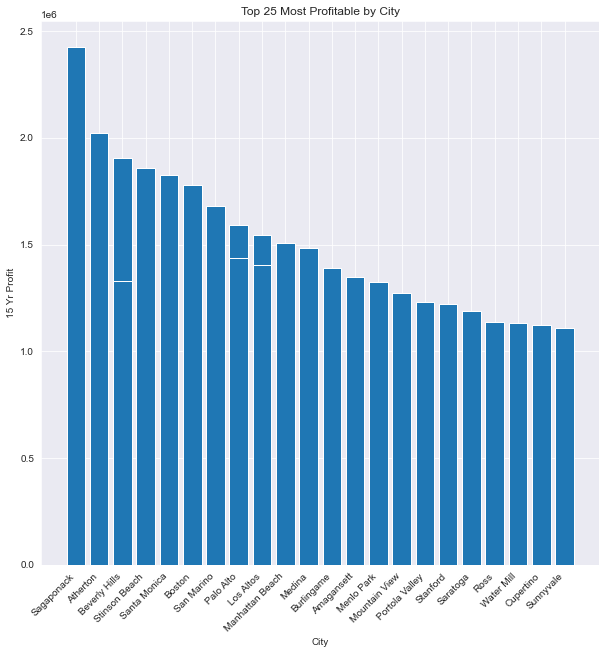

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
plt.bar(top_25_zip['City'], top_25_zip['15_yr_Profit'])
plt.xticks(rotation=45, ha='right')
plt.title('Top 25 Most Profitable by City')
plt.ylabel('15 Yr Profit')
plt.xlabel('City');

#### Next we will move forward dropping all uneeded columns and renaming our column for easier readability. We will move forward using only the RegionName column since our stakeholder is only interested in profit by zipcode.

In [24]:
time_series_df = top_25_zip.drop(['RegionID', 'SizeRank', 'RegionType', 'StateName',\
                                'State', 'City', 'Metro', 'CountyName', '15_yr_Profit'], axis=1)
time_series_df.rename(columns={'RegionName': 'Zipcode'}, inplace=True)
time_series_df.head()

,Zipcode,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31
20675,11962,3043100.0,3130526.0,3214359.0,3303308.0,3385921.0,3475642.0,3520254.0,3606951.0,3680653.0,3757357.0,3807778.0,3839202.0,3764095.0,3702979.0,3651744.0,3626729.0,3600918.0,3568309.0,3579389.0,3566136.0,3551233.0,3536558.0,3503431.0,3492606.0,3526787.0,3563092.0,3591084.0,3541892.0,3504756.0,3459380.0,3444140.0,3420922.0,3384914.0,3336030.0,3307357.0,3284243.0,3283564.0,3264539.0,3254649.0,3246967.0,3234671.0,3216088.0,3188391.0,3166578.0,3183274.0,3202804.0,3236151.0,3251648.0,3240745.0,3247527.0,3247511.0,3283218.0,3303326.0,3320050.0,3324990.0,3331326.0,3324825.0,3310438.0,3288395.0,3268286.0,3271706.0,3277336.0,3289576.0,3279103.0,3271463.0,3267106.0,3251693.0,3234143.0,3221200.0,3249297.0,3278146.0,3316230.0,3324165.0,3302879.0,3284659.0,3307447.0,3341784.0,3378104.0,3409125.0,3463928.0,3502274.0,3496221.0,3459222.0,3413538.0,3390936.0,3419973.0,3429477.0,3421222.0,3410349.0,3429864.0,3474977.0,3505400.0,3545520.0,3583498.0,3654737.0,3727159.0,3817207.0,3849130.0,3905299.0,3959685.0,4028940.0,4067485.0,4078673.0,4085208.0,4100255.0,4133279.0,4175570.0,4236371.0,4286620.0,4360388.0,4402265.0,4419167.0,4410453.0,4411703.0,4447826.0,4479323.0,4502916.0,4530140.0,4524350.0,4490890.0,4452930.0,4455941.0,4499839.0,4540602.0,4561120.0,4563803.0,4541370.0,4552489.0,4548612.0,4542714.0,4544356.0,4578996.0,4597616.0,4572764.0,4519687.0,4525403.0,4574075.0,4643451.0,4698960.0,4714446.0,4734008.0,4757276.0,4800996.0,4824645.0,4849624.0,4878181.0,4914312.0,4887832.0,4859830.0,4837866.0,4868819.0,4905350.0,4939492.0,4965025.0,4968713.0,4966601.0,4957652.0,4961521.0,4973245.0,5010413.0,5027475.0,5034187.0,5029377.0,5040681.0,5035617.0,5011030.0,4964678.0,4950301.0,4964023.0,5013146.0,5054332.0,5080477.0,5092707.0,5108927.0,5124652.0,5143760.0,5179782.0,5239197.0,5327955.0,5404176.0,5468141.0
12344,94027,4486051.0,4475666.0,4493365.0,4494467.0,4466959.0,4447733.0,4443505.0,4457609.0,4448963.0,4438560.0,4447022.0,4467968.0,4485343.0,4501081.0,4493452.0,4477368.0,446609

In [25]:
time_series_df['Zipcode'] = time_series_df['Zipcode'].astype(str)

#### Now that we have our dataframe to where we want it we will begin moving our date columns to the index. We will begin with a transpose and then setting our zipcodes as our columns.

In [26]:
time_series_df = time_series_df.T
time_series_df.head()

,20675,12344,5307,22590,8346,16372,9352,6367,6525,2250,15115,3689,5999,1472,14827,9981,1633,1936,12030,9402,3538,17210,13825,534,597
Zipcode,11962,94027,90210,94970,90402,2199,91108,94301,94022,90266,98039,94306,94024,94010,11930,90211,94025,94040,94028,94305,95070,94957,11976,95014,94087
2006-01-31,3043100.0,4486051.0,3479518.0,1449829.0,2390399.0,2532347.0,687613.0,2251694.0,2244545.0,1186473.0,1735464.0,1483778.0,1920045.0,1614434.0,1808430.0,1023665.0,1136157.0,1178295.0,2339328.0,1908488.0,1787204.0,2276124.0,2437682.0,1172975.0,1001069.0
2006-02-28,3130526.0,4475666.0,3497642.0,1470507.0,2401595.0,2526880.0,691159.0,2260678.0,2246509.0,1192511.0,1759371.0,1484647.0,1925692.0,1613371.0,1812401.0,1033166.0,1136084.0,1183539.0,2340048.0,1907927.0,1791717.0,2264627.0,2467430.0,1176913.0,1004972.0
2006-03-31,3214359.0,4493365.0,3520809.0,1472763.0,2417044.0,2532922.0,695194.0,2244776.0,2230928.0,1200582.0,1780319.0,1472605.0,1913505.0,1624373.0,1812060.0,1043776.0,1143418.0,1177820.0,2352226.0,1897560.0,1780088.0,2264595.0,2494825.0,1170162.0,999288.0
2006-04-30,3303308.0,4494467.0,3533063.0,1487182.0,2423313.0,2526730.0,696813.0,2238486.0,2220760.0,1205544.0,1807546.0,1464635.0,1903416.0,1629510.0,1844197.0,1048085.0,1146774.0,1173502.0,2354936.0,1882272.0,1771207.0,2285383.0,2514487.0,1166225.0,995772.0


#### In the above dataframe we can see that the first row is all of our zip codes. Below we will grab that first row and set it as our column header.

In [27]:
#Selecting first row
time_series_df_header = time_series_df.iloc[0]
#Selecting the rest of the dataframe
time_series_df = time_series_df.iloc[1:]
#Setting time_series_df_header as our columns
time_series_df.columns = time_series_df_header
time_series_df.head()

Zipcode,11962,94027,90210,94970,90402,2199,91108,94301,94022,90266,98039,94306,94024,94010,11930,90211,94025,94040,94028,94305,95070,94957,11976,95014,94087
2006-01-31,3043100.0,4486051.0,3479518.0,1449829.0,2390399.0,2532347.0,687613.0,2251694.0,2244545.0,1186473.0,1735464.0,1483778.0,1920045.0,1614434.0,1808430.0,1023665.0,1136157.0,1178295.0,2339328.0,1908488.0,1787204.0,2276124.0,2437682.0,1172975.0,1001069.0
2006-02-28,3130526.0,4475666.0,3497642.0,1470507.0,2401595.0,2526880.0,691159.0,2260678.0,2246509.0,1192511.0,1759371.0,1484647.0,1925692.0,1613371.0,1812401.0,1033166.0,1136084.0,1183539.0,2340048.0,1907927.0,1791717.0,2264627.0,2467430.0,1176913.0,1004972.0
2006-03-31,3214359.0,4493365.0,3520809.0,1472763.0,2417044.0,2532922.0,695194.0,2244776.0,2230928.0,1200582.0,1780319.0,1472605.0,1913505.0,1624373.0,1812060.0,1043776.0,1143418.0,1177820.0,2352226.0,1897560.0,1780088.0,2264595.0,2494825.0,1170162.0,999288.0
2006-04-30,3303308.0,4494467.0,3533063.0,1487182.0,2423313.0,2526730.0,696813.0,2238486.0,2220760.0,1205544.0,1807546.0,1464635.0,1903416.0,1629510.0,1844197.0,1048085.0,1146774.0,1173502.0,2354936.0,1882272.0,1771207.0,2285383.0,2514487.0,1166225.0,995772.0
2006-05-31,3385921.0,4466959.0,3562308.0,1491707.0,2438672.0,2509011.0,701329.0,2230846.0,2213883.0,1214716.0,1828949.0,1459163.0,1893836.0,1621674.0,1864130.0,1053205.0,1141752.0,1170684.0,2330081.0,1880962.0,1764731.0,2291849.0,2539993.0,1162122.0,993336.0


#### Next we will set our dates to the datetime format needed for time series.

In [31]:
time_series_df.index = pd.to_datetime(time_series_df.index)
time_series_df = time_series_df.astype(int)
time_series_df.reset_index()
time_series_df.head()

Zipcode,11962,94027,90210,94970,90402,2199,91108,94301,94022,90266,98039,94306,94024,94010,11930,90211,94025,94040,94028,94305,95070,94957,11976,95014,94087
2006-01-31,3043100,4486051,3479518,1449829,2390399,2532347,687613,2251694,2244545,1186473,1735464,1483778,1920045,1614434,1808430,1023665,1136157,1178295,2339328,1908488,1787204,2276124,2437682,1172975,1001069
2006-02-28,3130526,4475666,3497642,1470507,2401595,2526880,691159,2260678,2246509,1192511,1759371,1484647,1925692,1613371,1812401,1033166,1136084,1183539,2340048,1907927,1791717,2264627,2467430,1176913,1004972
2006-03-31,3214359,4493365,3520809,1472763,2417044,2532922,695194,2244776,2230928,1200582,1780319,1472605,1913505,1624373,1812060,1043776,1143418,1177820,2352226,1897560,1780088,2264595,2494825,1170162,999288
2006-04-30,3303308,4494467,3533063,1487182,2423313,2526730,696813,2238486,2220760,1205544,1807546,1464635,1903416,1629510,1844197,1048085,1146774,1173502,2354936,1882272,1771207,2285383,2514487,1166225,995772
2006-05-31,3385921,4466959,3562308,1491707,2438672,2509011,701329,2230846,2213883,1214716,1828949,1459163,1893836,1621674,1864130,1053205,1141752,1170684,2330081,1880962,1764731,2291849,2539993,1162122,993336


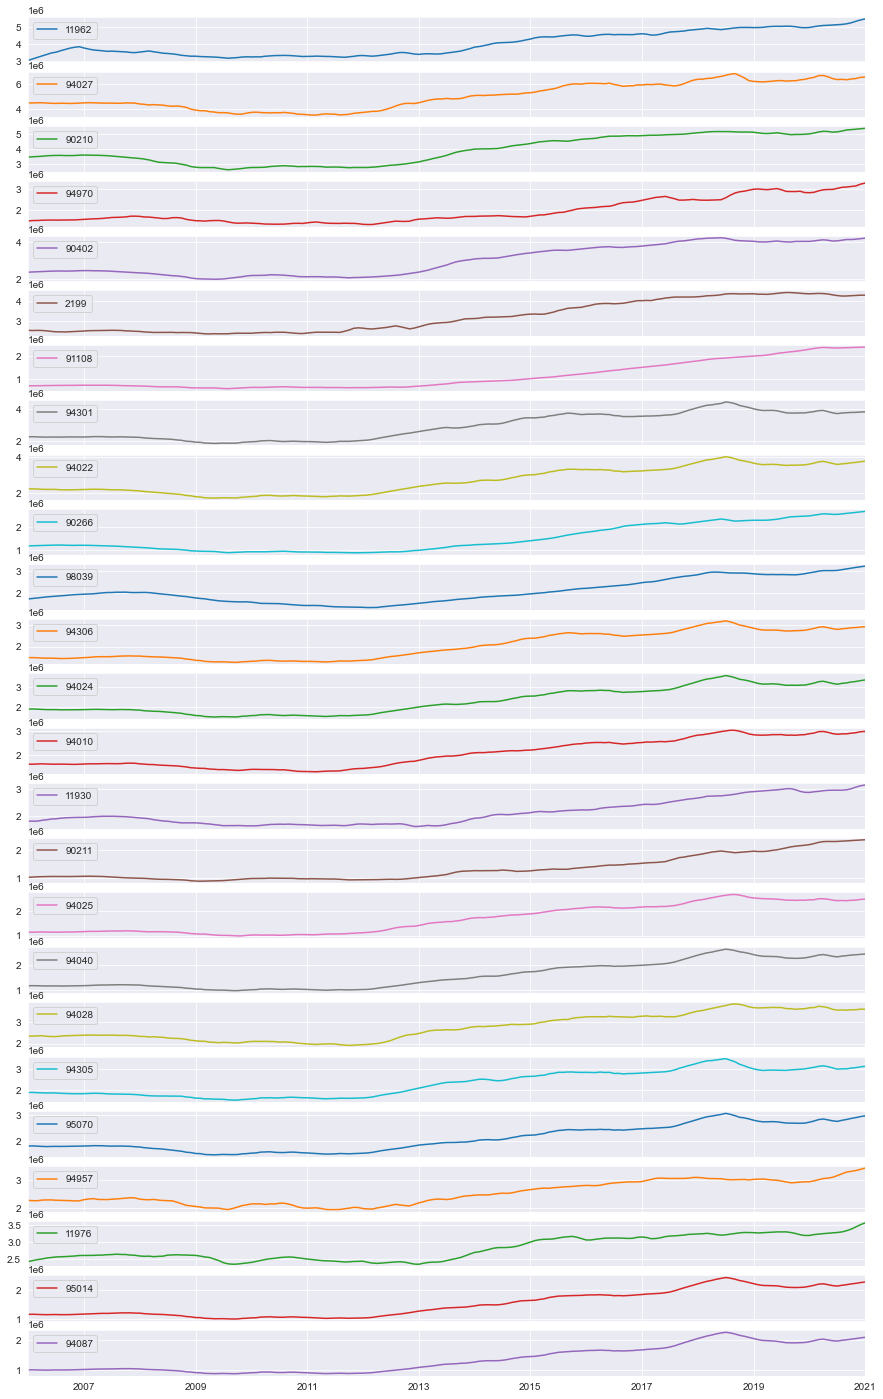

In [32]:
time_series_df.plot(figsize=(15,25), subplots=True);

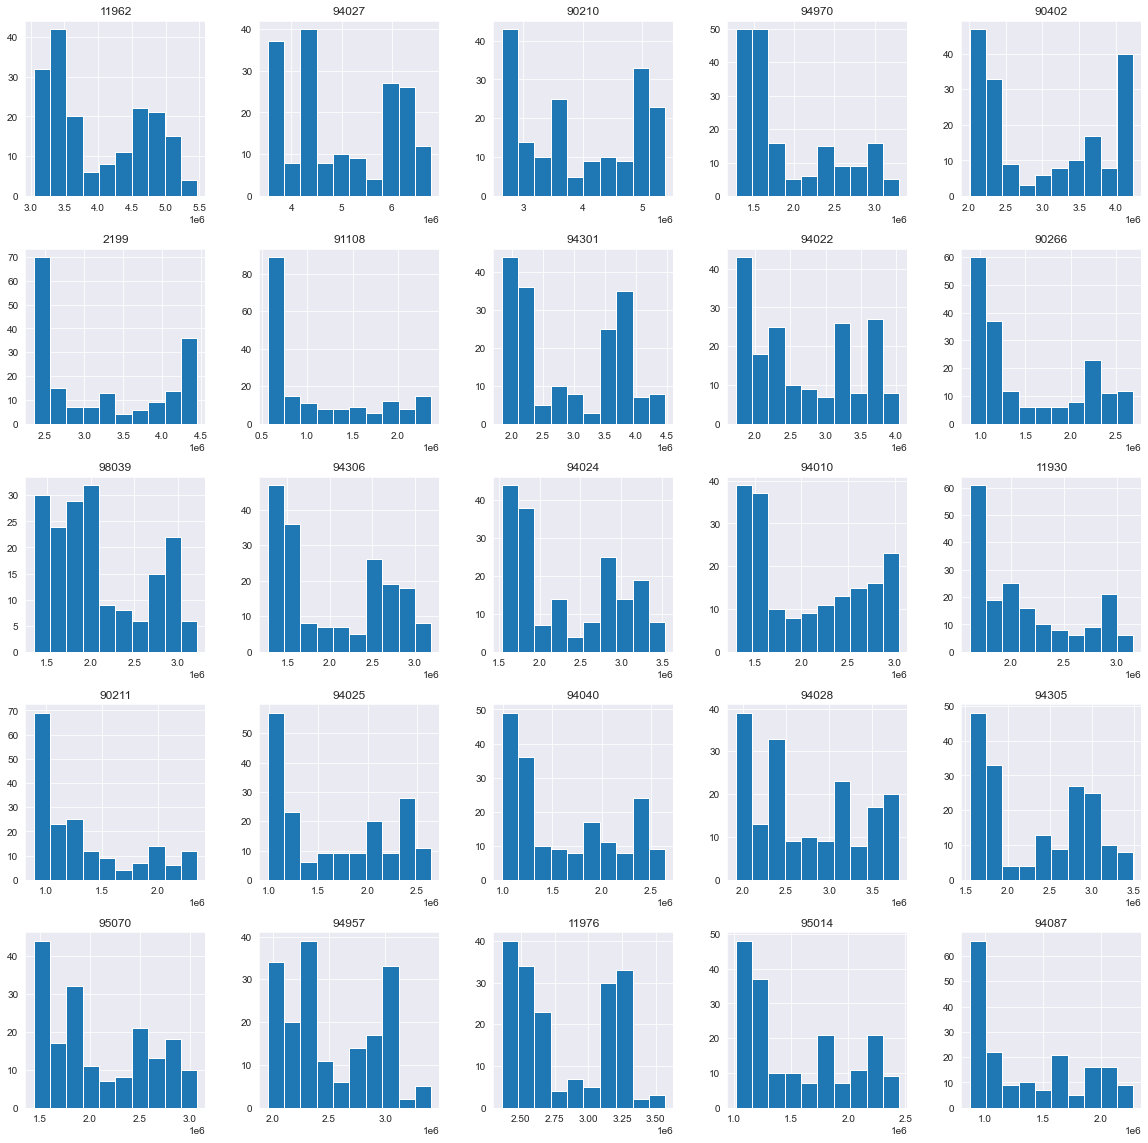

In [33]:
time_series_df.hist(figsize=(20,20));

# Step 5: ARIMA Modeling

In [45]:
from statsmodels.tsa.arima_model import ARIMA

# Step 6: Interpreting Results